<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/14_7_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [0]:
warnings.filterwarnings('ignore')
#sns.set(style="whitegrid")

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db =  'studentsperformance'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
sp1 = pd.read_sql_query('select * FROM studentsperformance',con=engine)
#educate= engine.execute('SELECT * FROM student performance' )
engine.dispose()

In [0]:
sp2=sp1.copy()

In [0]:

sp2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

1 - **Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?**

In [0]:
sp2['winsorized math score'] = winsorized_views = winsorize(sp2['math score'], (0, 0.10))
sp2['winzorized reading score'] = winsorized_views = winsorize(sp2['reading score'], (0, 0.10))
sp2['winsorized writing score'] = winsorized_views = winsorize(sp2['writing score'], (0, 0.10))


In [0]:
from scipy.stats import boxcox
#video_uploads_boxcox,_ = boxcox(youtube_df["Video Uploads"])

#sp2['boxcox math score'],_ = boxcox(sp2['math score'])
sp2['boxcox reading reading'],_ = boxcox(sp2['reading score'])
sp2['boxcox writing reading'],_ = boxcox(sp2['writing score'])


<function matplotlib.pyplot.show>

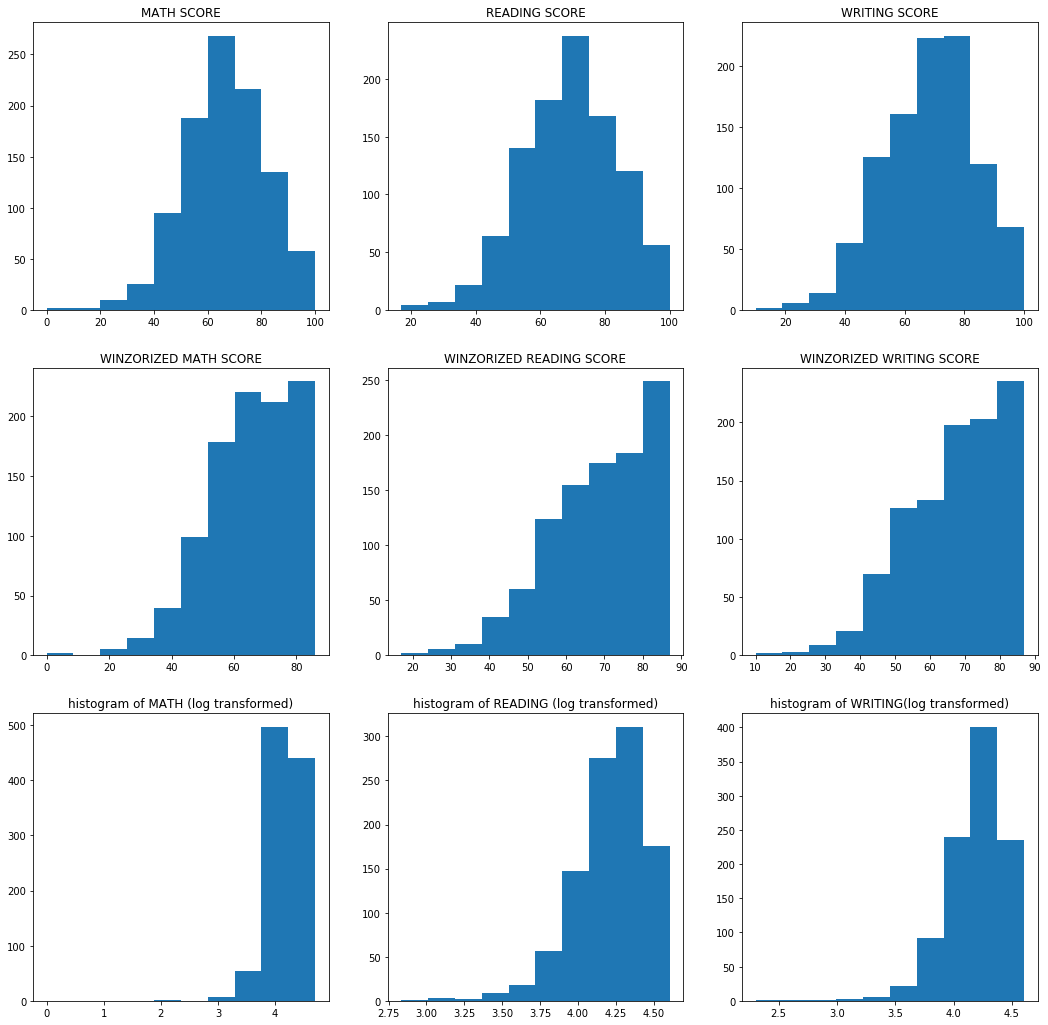

In [0]:
plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
plt.hist(sp2['math score'])
plt.title("MATH SCORE")

plt.subplot(3,3,2)
plt.hist(sp2['reading score'])
plt.title("READING SCORE")

plt.subplot(3,3,3)
plt.hist(sp2['writing score'])
plt.title("WRITING SCORE")

plt.subplot(3,3,4)
plt.hist(sp2['winsorized math score'])
plt.title("WINZORIZED MATH SCORE")

plt.subplot(3,3,5)
plt.hist(sp2['winzorized reading score'])
plt.title("WINZORIZED READING SCORE")

plt.subplot(3,3,6)
plt.hist(sp2['winsorized writing score'])
plt.title("WINZORIZED WRITING SCORE")

plt.subplot(3,3,7)
plt.hist(np.log(sp2['math score']),range=(0,4.7))
plt.title("histogram of MATH (log transformed)")

plt.subplot(3,3,8)
plt.hist(np.log(sp2['reading score']))
plt.title("histogram of READING (log transformed)")

plt.subplot(3,3,9)
plt.hist(np.log(sp2['writing score']))
plt.title("histogram of WRITING(log transformed)")



plt.show


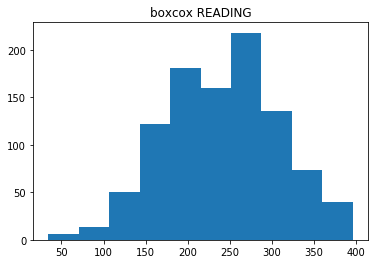

In [0]:


plt.hist(sp2['boxcox reading reading'])
plt.title("boxcox READING")
plt.show()

In [0]:
norm_stats3 = normaltest(sp2['boxcox reading reading'])

jb_stats3 = jarque_bera(sp2['boxcox reading reading'])

**BOXCOX NORMALIZES** -- positive values only

In [0]:
norm_stats3

NormaltestResult(statistic=5.282274606965809, pvalue=0.07128015626992971)

In [0]:
jb_stats3

(4.119778573559666, 0.127468081515408)

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(sp2['math score']))
norm_stats = normaltest(np.log(sp2['math score']))

In [0]:
jb_stats

(nan, nan)

In [0]:
norm_stats

NormaltestResult(statistic=nan, pvalue=nan)

In [0]:
jb_stats2 = jarque_bera(np.log(sp2['reading score']))
norm_stats2 = normaltest(np.log(sp2['reading score']))

In [0]:
jb_stats2

(495.1273179446674, 0.0)

In [0]:
norm_stats2

NormaltestResult(statistic=209.7715093472919, pvalue=2.8099300901335873e-46)

2 -**Say we want to use a single variable for the exam scores as our target.** 

**For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed.**

**If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.**

CREATE WEIGHTED AVERAGE EXAM SCORE VARIABLE

In [0]:
bottom=sp2['math score']+sp2['reading score']+sp2['writing score']

In [0]:
sp2['weighted']=(sp2['math score']+sp2['reading score']+sp2['writing score']/bottom)

In [0]:
sp2['weighted']

0      144.339450
1      159.356275
2      185.334532
3      104.297297
4      154.327511
          ...    
995    187.336879
996    117.319767
997    130.333333
998    146.345291
999    163.345382
Name: weighted, Length: 1000, dtype: float64

In [0]:
sp2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized math score,winzorized reading score,winsorized writing score,boxcox reading reading,boxcox writing reading,weighted
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74,252.608698,271.189141,144.339450
1,female,group C,some college,standard,completed,69,90,88,69,87,87,342.993742,344.439015,159.356275
2,female,group B,master's degree,standard,none,90,95,93,86,87,87,369.367302,371.722711,185.334532
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44,183.336686,132.202142,104.297297
4,male,group C,some college,standard,none,76,78,75,76,78,75,281.909487,276.260478,154.327511


**New Variable is normal**

In [0]:
jb_stats2w = jarque_bera((sp2['weighted']))

norm_stats2w = normaltest(sp2['weighted'])

In [0]:
norm_stats2w

NormaltestResult(statistic=13.735117674014473, pvalue=0.0010410152531998408)

In [0]:
jb_stats2w

(13.899273327421412, 0.0009589835239175448)

In [0]:
jb_stats2w

(13.899273327421412, 0.0009589835239175448)

3 - **Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?**

In [0]:
list(sp2)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'winsorized math score',
 'winzorized reading score',
 'winsorized writing score',
 'boxcox reading reading',
 'boxcox writing reading',
 'weighted']

# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['Gender']= le.fit_transform(data['Gender'])

In [0]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
sp2['gender']= le.fit_transform(sp2['gender'])

In [0]:
sp2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized math score,winzorized reading score,winsorized writing score,boxcox reading reading,boxcox writing reading,weighted
0,0,group B,bachelor's degree,standard,none,72,72,74,72,72,74,252.608698,271.189141,144.339450
1,0,group C,some college,standard,completed,69,90,88,69,87,87,342.993742,344.439015,159.356275
2,0,group B,master's degree,standard,none,90,95,93,86,87,87,369.367302,371.722711,185.334532
3,1,group A,associate's degree,free/reduced,none,47,57,44,47,57,44,183.336686,132.202142,104.297297
4,1,group C,some college,standard,none,76,78,75,76,78,75,281.909487,276.260478,154.327511


In [0]:
new_df=sp2[['gender','weighted']]
new_df.head()

,gender,weighted
0,0,144.339450
1,0,159.356275
2,0,185.334532
3,1,104.297297
4,1,154.327511


In [0]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
gender      1000 non-null int64
weighted    1000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


**CONVERT OBJECT TO NUMERIC**

In [0]:
pd.to_numeric(new_df['gender'])

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int64

In [0]:
new_df.corr()

,gender,weighted
gender,1.000000,-0.036441
weighted,-0.036441,1.000000


In [0]:
pd.get_dummies(new_df['gender'])

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


female=0  male= 1

In [0]:
df3 = pd.concat([new_df, pd.get_dummies(new_df['gender'])], axis=1)


In [0]:
df3.head()

,gender,weighted,0,1
0,0,144.339450,1,0
1,0,159.356275,1,0
2,0,185.334532,1,0
3,1,104.297297,0,1
4,1,154.327511,0,1


In [0]:
df3.corr()

,gender,weighted,0,1
gender,1.000000,-0.036441,-1.000000,1.000000
weighted,-0.036441,1.000000,0.036441,-0.036441
0,-1.000000,0.036441,1.000000,-1.000000
1,1.000000,-0.036441,-1.000000,1.000000


///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
pd.get_dummies(sp2['gender'])

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [0]:
test=pd.get_dummies(sp2)

In [0]:
test.corr()

,math score,reading score,writing score,weighted,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,0.954954,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.951626,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.920416,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
weighted,0.954954,0.951626,0.920416,1.000000,0.036441,-0.036441,-0.098735,-0.076060,-0.040750,0.044929,0.164817,0.066932,0.092059,-0.146609,0.087146,0.025349,-0.079436,-0.305559,0.305559,0.219579,-0.219579
gender_female,-0.167982,0.244313,0.301225,0.036441,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-0.036441,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
race/ethnicity_group A,-0.091977,-0.096274,-0.110714,-0.098735,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.076060,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.040750,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522
race/ethnicity_group D,0.050071,0.035177,0.082032,0.044929,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956


  **LUNCH HAS HIGHEST CORRELATION -- YES**

In [0]:
h=list(test)

In [0]:
h

['math score',
 'reading score',
 'writing score',
 'weighted',
 'gender_female',
 'gender_male',
 'race/ethnicity_group A',
 'race/ethnicity_group B',
 'race/ethnicity_group C',
 'race/ethnicity_group D',
 'race/ethnicity_group E',
 "parental level of education_associate's degree",
 "parental level of education_bachelor's degree",
 'parental level of education_high school',
 "parental level of education_master's degree",
 'parental level of education_some college',
 'parental level of education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test preparation course_completed',
 'test preparation course_none']

In [0]:
h2=h[3:]

In [0]:
test2=test[h2]

In [0]:
test2.head()

,weighted,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,144.339450,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,159.356275,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,185.334532,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,104.297297,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,154.327511,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


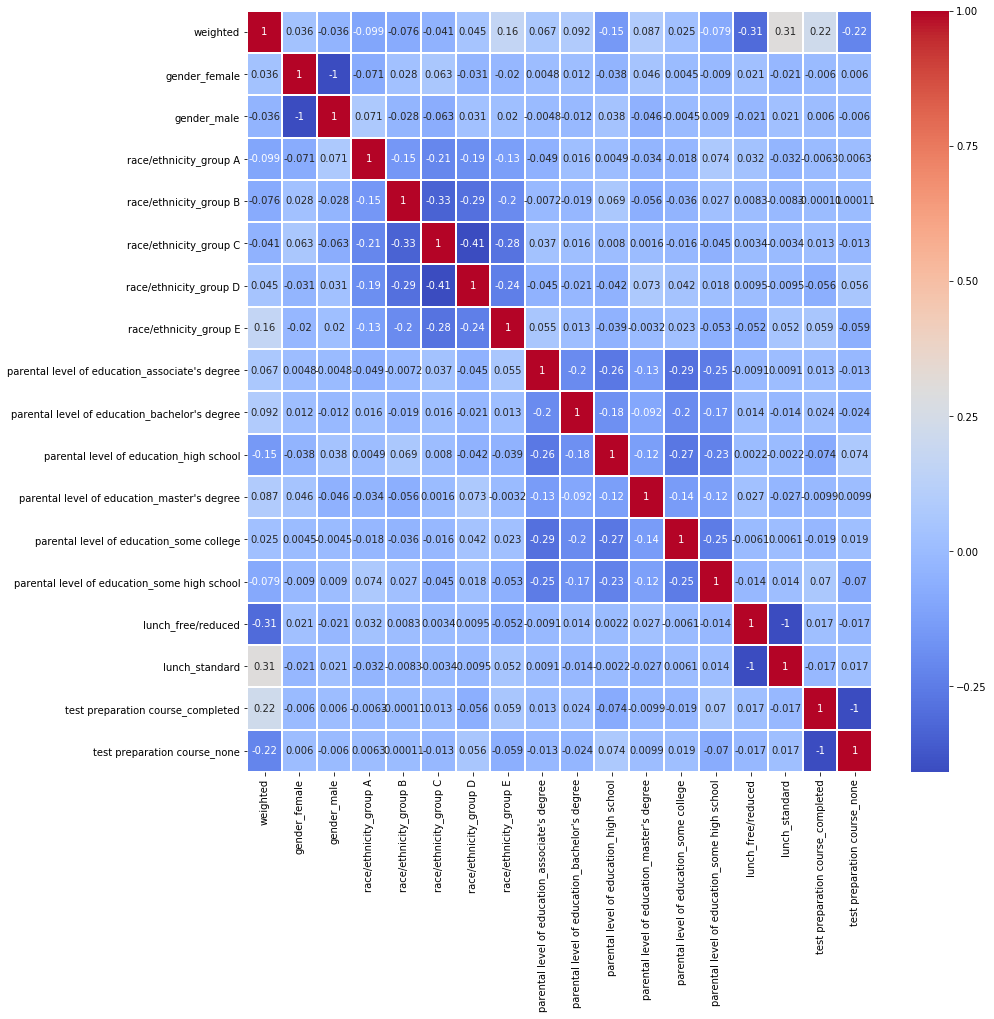

In [0]:
plt.figure(figsize=(14,14))
sns.heatmap(test2.corr(),linewidth=1.0,cmap='coolwarm',annot=True, robust=True)

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
q=np.log(sp2['math score'])

In [0]:
(q==0).count()

1000

In [0]:
q.max()

4.605170185988092

In [0]:
q.min()

-inf

In [0]:
q.isnull().sum()

0

not so normal

In [0]:
spe=sp1.copy()

In [0]:
spe.set_index(['race/ethnicity'],inplace=True)

In [0]:
#list(df.index.values) 
#list(spe.index.values) 

In [0]:
spe.loc[['group B','group C'],:]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group B,female,bachelor's degree,standard,none,72,72,74
group B,female,master's degree,standard,none,90,95,93
group B,female,associate's degree,standard,none,71,83,78
group B,female,some college,standard,completed,88,95,92
group B,male,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...
group C,female,associate's degree,standard,none,91,95,94
group C,female,some high school,standard,none,74,75,82
group C,female,associate's degree,standard,none,40,59,51


In [0]:
spe.loc[d,['math score','reading score','writing score']]

,math score,reading score,writing score
race/ethnicity,,,
group B,72,72,74
group B,90,95,93
group B,71,83,78
group B,88,95,92
group B,40,43,39
...,...,...,...
group E,100,100,100
group E,68,76,67
group E,81,75,76


In [0]:
d=sp2['race/ethnicity'].unique()

In [0]:
d4=d

In [0]:
stats.ttest_ind(spe.loc[['group A'],['math score','reading score','writing score']],spe.loc[d3,['math score','reading score','writing score']])

Ttest_indResult(statistic=array([-3.0348354 , -3.0285393 , -3.53481986]), pvalue=array([0.00247611, 0.00252776, 0.00042892]))

In [0]:
stats.ttest_ind(spe.loc[['group A'],['math score','reading score','writing score']],spe.loc[['group B'],['math score','reading score','writing score']])

Ttest_indResult(statistic=array([-0.93550763, -1.36336823, -1.46244206]), pvalue=array([0.3503416 , 0.17387355, 0.14475374]))

In [0]:
stats.ttest_ind(spe.loc[['group A','group B'],['math score','reading score','writing score']],spe.loc[['group C','group D'],['math score','reading score','writing score']])

Ttest_indResult(statistic=array([-2.71279058, -2.88132655, -3.84253393]), pvalue=array([0.00680555, 0.00405879, 0.00013075]))

In [0]:
d4=d

In [0]:
count=0
limit=len(d)*(len(d4)-1)/2
for a in d:
  for b in d4:
    if a!=b:
     count=count+1
     
     #if count<=limit:
    print( stats.ttest_ind(spe.loc[[a],['math score','reading score','writing score']],spe.loc[[b],['math score','reading score','writing score']]), a,b,count)
     #count=count+1

Ttest_indResult(statistic=array([0., 0., 0.]), pvalue=array([1., 1., 1.])) group B group B 0
Ttest_indResult(statistic=array([-0.73156699, -1.32231562, -1.59649634]), pvalue=array([0.46477089, 0.18665928, 0.1110011 ])) group B group C 1
Ttest_indResult(statistic=array([0.93550763, 1.36336823, 1.46244206]), pvalue=array([0.3503416 , 0.17387355, 0.14475374])) group B group A 2
Ttest_indResult(statistic=array([-2.8284554 , -1.94515636, -3.19929333]), pvalue=array([0.0048862 , 0.05237862, 0.001475  ])) group B group D 3
Ttest_indResult(statistic=array([-6.00739705, -3.38606695, -3.38319783]), pvalue=array([5.00794605e-09, 7.95161850e-04, 8.03230049e-04])) group B group E 4
Ttest_indResult(statistic=array([0.73156699, 1.32231562, 1.59649634]), pvalue=array([0.46477089, 0.18665928, 0.1110011 ])) group C group B 5
Ttest_indResult(statistic=array([0., 0., 0.]), pvalue=array([1., 1., 1.])) group C group C 5
Ttest_indResult(statistic=array([1.59972203, 2.57543222, 2.8488724 ]), pvalue=array([0.1

In [0]:
d

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [0]:
limit=len(a)*(len(b)-1)/2
limit

21.0

In [0]:
d2=d[::-1]
d3=d2[0:4]
d3

array(['group E', 'group D', 'group A', 'group C'], dtype=object)

In [0]:
list(spe)

['gender',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [0]:
spe.loc['group B','math score']

race/ethnicity
group B    72
group B    90
group B    71
group B    88
group B    40
           ..
group B    75
group B    60
group B     8
group B    79
group B    65
Name: math score, Length: 190, dtype: int64

In [0]:
spe.loc[:,'math score']

race/ethnicity
group B    72
group C    69
group B    90
group A    47
group C    76
           ..
group E    88
group C    62
group C    59
group D    68
group D    77
Name: math score, Length: 1000, dtype: int64

In [0]:
stats.ttest_ind()

In [0]:
sp2.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [0]:
sp2.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:
sp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
sp2.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


Does the test preparation course seem to have an effect on the exam performances?


Which 2 exam scores are most correlated with each other?

1 -**Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?**

so compare exam performance to gender -- ethnicity -- parental level of education

exams are continuous -- others categorical

In [0]:
sp_male=sp2[sp2['gender']=='male']

In [0]:
sp_male.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


In [0]:
sp_female=sp2[sp2['gender']=='female']

In [0]:
stats.ttest_ind(sp_male['math score'],sp_female['math score'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

In [0]:
stats.ttest_ind(sp_male[['math score','reading score','writing score']],sp_female[['math score','reading score','writing score']])

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
sp_male[['math score','reading score','writing score']].head()

,math score,reading score,writing score
3,47,57,44
4,76,78,75
7,40,43,39
8,64,64,67
10,58,54,52


another way


In [0]:
#temp.loc[1,:]
#sp2.loc[:,'gender']

does not work because gender is not the key

In [0]:
sp2.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [0]:
ttest_ind()

In [0]:
sg=sp2.groupby('race/ethnicity').mean()

In [0]:
sg['math score']

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

In [0]:
sp

In [0]:
sp2.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


**Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?**

In [0]:
sp2.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


yes

explanation -- students with free/reduced came from poorer homes

**Does the test preparation course seem to have an effect on the exam performances?**

In [0]:
sp2.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


**Which 2 exam scores are most correlated with each other?**

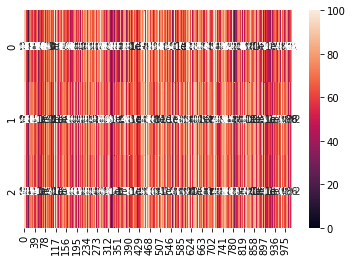

In [0]:
sns.heatmap([sp2['math score'],sp2['reading score'],sp2['writing score']],annot=True)

In [0]:
sp_subset=sp2[['math score','reading score','writing score']]

In [0]:
sp_subset.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [0]:
sp_subset.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


reading + writing  highest correlation